<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-2-Sprint-3-Advanced-Regression/blob/master/module4-ridge-regression/Regularization_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

Following is data describing characteristics of blog posts, with a target feature of how many comments will be posted in the following 24 hours.

https://archive.ics.uci.edu/ml/datasets/BlogFeedback

Investigate - you can try both linear and ridge. You can also sample to smaller data size and see if that makes ridge more important. Don't forget to scale!

Focus on the training data, but if you want to load and compare to any of the test data files you can also do that.

Note - Ridge may not be that fundamentally superior in this case. That's OK! It's still good to practice both, and see if you can find parameters or sample sizes where ridge does generalize and perform better.

When you've fit models to your satisfaction, answer the following question:

```
Did you find cases where Ridge performed better? If so, describe (alpha parameter, sample size, any other relevant info/processing). If not, what do you think that tells you about the data?
```

You can create whatever plots, tables, or other results support your argument. In this case, your target audience is a fellow data scientist, *not* a layperson, so feel free to dig in!

Notes:
* Overfit model performs poorly on the testing data but well on the training data, vice versa for underfit.
* Not being able to generalize a models fit to out of sample data causes over-fitting or under-fitting.
* Make sure to not only look at the test accuracy but also the training accuracy is well. Compare them, if one is substantially worse than the other, be able to tell whether it's over or underfit.
* Ridge regression is not an inferential modelling technique, scaling the data makes the interpretation of coefficients different.
* Precision = variance.
* Bias = accuracy.
* Read the intuition section in the lecture notes.
* Really high R^2 values can also indicate overfitting.
* The way to test for overfitting is get a train accuracy and then get a test accuracy. If training accuracy is better than test accuracy, then you have problems with overfitting.
* We want to have at least 5x as many observations as features.

In [2]:
# TODO - write some code!
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00304/BlogFeedback.zip
!unzip BlogFeedback.zip

--2019-02-28 22:01:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/00304/BlogFeedback.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2583605 (2.5M) [application/zip]
Saving to: ‘BlogFeedback.zip’

BlogFeedback.zip    100%[===================>]   2.46M  3.71MB/s    in 0.7s    

2019-02-28 22:01:20 (3.71 MB/s) - ‘BlogFeedback.zip’ saved [2583605/2583605]

Archive:  BlogFeedback.zip
  inflating: blogData_test-2012.02.01.00_00.csv  
  inflating: blogData_test-2012.02.02.00_00.csv  
  inflating: blogData_test-2012.02.03.00_00.csv  
  inflating: blogData_test-2012.02.04.00_00.csv  
  inflating: blogData_test-2012.02.05.00_00.csv  
  inflating: blogData_test-2012.02.06.00_00.csv  
  inflating: blogData_test-2012.02.07.00_00.csv  
  inflating: blogData_test-2012.02.08.00_00.csv  
  inflating: blogData_test-20

In [0]:
from sklearn.linear_model import Ridge
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [54]:
df = pd.read_csv('blogData_train.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [55]:
(df.dtypes == 'float').sum()

281

In [56]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
count,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,...,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.0,52397.000000,52397.000000,52397.000000
mean,39.444167,46.806717,0.358914,339.853102,24.681661,15.214611,27.959159,0.002748,258.666030,5.829151,...,0.171327,0.162242,0.154455,0.096151,0.088917,0.119167,0.0,1.242094,0.769505,6.764719
std,79.121821,62.359996,6.840717,441.430109,69.598976,32.251189,38.584013,0.131903,321.348052,23.768317,...,0.376798,0.368676,0.361388,0.294800,0.284627,1.438194,0.0,27.497979,20.338052,37.706565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.285714,5.214318,0.000000,29.000000,0.000000,0.891566,3.075076,0.000000,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,10.630660,19.353120,0.000000,162.000000,4.000000,4.150685,11.051215,0.000000,121.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.304670,77.442830,0.000000,478.000000,15.000000,15.998589,45.701206,0.000000,387.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,1122.666600,559.432600,726.000000,2044.000000,1314.000000,442.666660,359.530060,14.000000,1424.000000,588.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,136.000000,0.0,1778.000000,1778.000000,1424.000000


In [84]:
# Base model
X = df.drop(280, axis=1)
y = df[280]
lin_reg = LinearRegression().fit(X, y)
lin_reg.score(X, y)

0.36476030152844696

In [0]:
# Lets standardize
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [109]:
# Do we have overfitting when fitting on test data
# and generalizing on train data?
X = df.drop(280, axis=1)
y = df[280]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lin_reg = LinearRegression().fit(X_train, y_train)
print('Training MSE:',mean_squared_error(y, lin_reg.predict(X)))
print('Testing MSE:',mean_squared_error(y_test, lin_reg.predict(X_test)))
print('R^2 overall:', lin_reg.score(X_train, y_train))

Training MSE: 906.3942847230611
Testing MSE: 1011.5866434457496
R^2 overall: 0.37568622854933903


Looks like we do have some overfitting since training accuracy is worse than testing accuracy.

In [123]:
# Let's regularize via ridge regression

ridge_reg = Ridge(alpha=100).fit(X_train, y_train)
print('Training MSE:',mean_squared_error(y, ridge_reg.predict(X)))
print('Testing MSE:',mean_squared_error(y_test, ridge_reg.predict(X_test)))
print('R^2 overall:', ridge_reg.score(X_train, y_train))

Training MSE: 907.1324920327463
Testing MSE: 1010.1557389865352
R^2 overall: 0.374639194478795


Not much different from linear regression, let's tune some hyperparams, particularly regularization strength.

In [0]:
alphas = []
mses = []

for alpha in range(1, 500, 1):
  ridge_reg = Ridge(alpha=alpha).fit(X_train, y_train)
  mse = mean_squared_error(y_test, ridge_reg.predict(X_test))
  alphas.append(alpha)
  mses.append(mse)

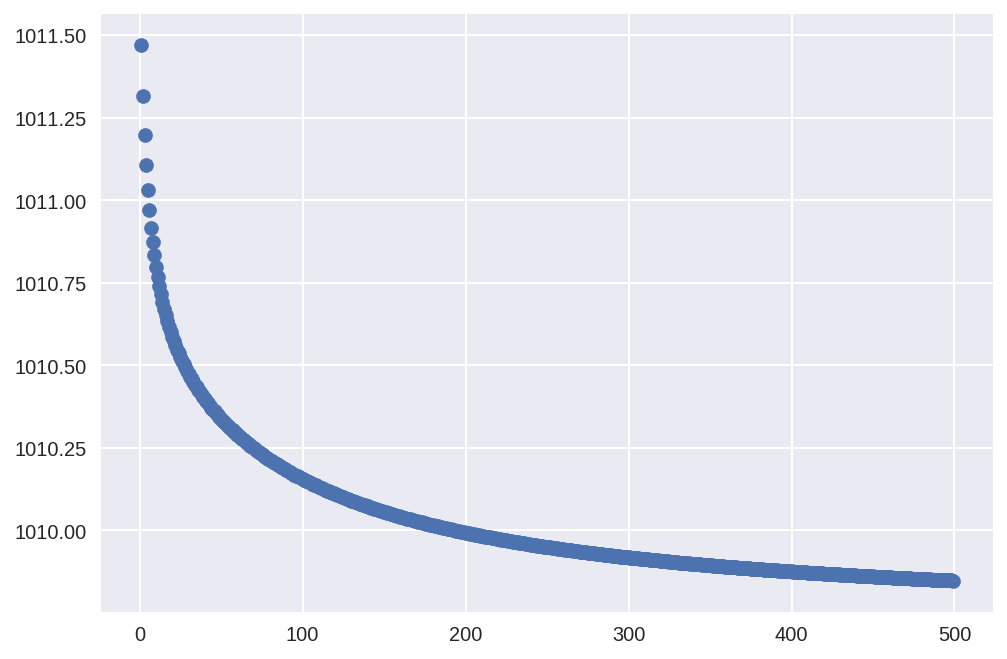

In [91]:
# Let's find the optimal regularization strength
plt.scatter(alphas, mses);

There doesn't seem to be an optimal regularization strength, it keeps going down indefinitely after 50.

In [106]:
# Does sampling to smaller sample size make ridge regression more important?
df_s = df.sample(5000)
X = df_s.drop(280, axis=1)
y = df_s[280]

ridge_reg = Ridge().fit(X_train, y_train)

print('Training MSE:',mean_squared_error(y, ridge_reg.predict(X)))
print('Testing MSE:',mean_squared_error(y_test, ridge_reg.predict(X_test)))
print('R^2 overall:', ridge_reg.score(X_train, y_train))

Training MSE: 1020.354213671757
Testing MSE: 1011.4711887177356
R^2 overall: 0.37564813938929986


If we downsample the data, the MSE indicates underfitting.

# Resources and stretch goals

Resources:
- https://www.quora.com/What-is-regularization-in-machine-learning
- https://blogs.sas.com/content/subconsciousmusings/2017/07/06/how-to-use-regularization-to-prevent-model-overfitting/
- https://machinelearningmastery.com/introduction-to-regularization-to-reduce-overfitting-and-improve-generalization-error/
- https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
- https://stats.stackexchange.com/questions/111017/question-about-standardizing-in-ridge-regression#111022

Stretch goals:
- Revisit past data you've fit OLS models to, and see if there's an `alpha` such that ridge regression results in a model with lower MSE on a train/test split
- Yes, Ridge can be applied to classification! Check out [sklearn.linear_model.RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier), and try it on a problem you previous approached with a different classifier (note - scikit LogisticRegression also automatically penalizes based on the $L^2$ norm, so the difference won't be as dramatic)
- Implement your own function to calculate the full cost that ridge regression is optimizing (the sum of squared residuals + `alpha` times the sum of squared coefficients) - this alone won't fit a model, but you can use it to verify cost of trained models and that the coefficients from the equivalent OLS (without regularization) may have a higher cost